In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("stockdata.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,14-Aug-23,"3,645.10","3,747.45","3,601.75","3,730.55","1,295,993"
1,11-Aug-23,"3,732.95","3,742.80","3,671.05","3,679.15","339,619"
2,10-Aug-23,"3,743.80","3,775.55","3,725.15","3,745.50","600,325"
3,9-Aug-23,"3,860.00","3,860.00","3,715.00","3,737.70","749,561"
4,8-Aug-23,"3,925.05","3,934.70","3,834.05","3,846.40","532,706"


In [5]:
df.columns= df.columns.str.strip()

In [6]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%b-%y')
df= df.sort_values(by='Date',ascending=True)
df

,Date,Open,High,Low,Close,Volume
19,2023-07-18,"3,670.00","3,683.00","3,567.00","3,626.65","385,790"
18,2023-07-19,"3,626.65","3,675.00","3,625.00","3,638.05","328,518"
17,2023-07-20,"3,650.00","3,679.15","3,620.05","3,666.55","336,955"
16,2023-07-21,"3,661.00","3,747.00","3,638.45","3,688.30","629,513"
15,2023-07-24,"3,688.25","3,710.00","3,656.95","3,686.00","304,318"
14,2023-07-25,"3,695.00","3,743.00","3,681.10","3,719.40","323,039"
13,2023-07-26,"3,743.00","3,743.00","3,673.55","3,680.45","293,630"
12,2023-07-27,"3,694.00","3,795.90","3,685.30","3,741.90","875,566"
11,2023-07-28,"3,769.00","3,775.00","3,710.00","3,739.05","355,259"
10,2023-07-31,"3,640.00","3,748.95","3,640.00","3,684.30","389,638"


In [7]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

In [8]:
df['Next_Open'] = df['Open'].shift(-1)
df.dropna(inplace=True)

In [9]:
df

,Date,Open,High,Low,Close,Volume,Next_Open
19,2023-07-18,3670.00,3683.00,3567.00,3626.65,385790.0,3626.65
18,2023-07-19,3626.65,3675.00,3625.00,3638.05,328518.0,3650.00
17,2023-07-20,3650.00,3679.15,3620.05,3666.55,336955.0,3661.00
16,2023-07-21,3661.00,3747.00,3638.45,3688.30,629513.0,3688.25
15,2023-07-24,3688.25,3710.00,3656.95,3686.00,304318.0,3695.00
14,2023-07-25,3695.00,3743.00,3681.10,3719.40,323039.0,3743.00
13,2023-07-26,3743.00,3743.00,3673.55,3680.45,293630.0,3694.00
12,2023-07-27,3694.00,3795.90,3685.30,3741.90,875566.0,3769.00
11,2023-07-28,3769.00,3775.00,3710.00,3739.05,355259.0,3640.00
10,2023-07-31,3640.00,3748.95,3640.00,3684.30,389638.0,3705.00


In [21]:
train_input = np.array(df.Open[0:10]).reshape(10,1)
train_output = np.array(df.Close[0:10]).reshape(10,1)

test_input = np.array(df.Open[10:20]).reshape(9,1)
test_output = np.array(df.Close[10:20]).reshape(9,1)

[[3670.  ]
 [3626.65]
 [3650.  ]
 [3661.  ]
 [3688.25]
 [3695.  ]
 [3743.  ]
 [3694.  ]
 [3769.  ]
 [3640.  ]]
[[3626.65]
 [3638.05]
 [3666.55]
 [3688.3 ]
 [3686.  ]
 [3719.4 ]
 [3680.45]
 [3741.9 ]
 [3739.05]
 [3684.3 ]]


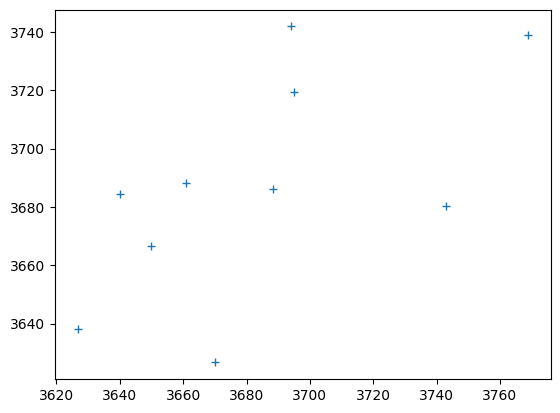

In [22]:
plt.plot(train_input, train_output, '+')
# plt.plot(test_input, test_output, '*')

In [23]:
class LinearRegression:
    def __init__(self):
        self.parameters= {}
        
    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        prediction = np.multiply(m, train_input) + c
        return prediction
    
    def cost_function(self, prediction, train_output):
        cost = np.mean((train_output - prediction) ** 2)
        return cost
    
    def backward_propagation(self, train_input, train_output, prediction):
        derivatives = {}
        df = (train_output - prediction) * -1
        dm = np.mean(np.multiply(train_input, df))
        dc = np.mean(df)
        derivatives['dm']=dm
        derivatives['dc']=dc
        return derivatives
    
    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']
    
    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0,1) * -1
        self.parameters['c'] = np.random.uniform(0,1) * -1
        
        self.loss=[]
        
        for i in range(iters):
            
            prediction = self.forward_propagation(train_input)
            
            cost = self.cost_function(prediction, train_output)
            
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(i+1, cost))
            
            derivatives= self.backward_propagation(train_input, train_output, prediction)
            
            self.update_parameters(derivatives, learning_rate)
            
        return self.parameters, self.loss
    
    def predict(self, new_input):
        prediction= self.forward_propagation(new_input)
        return prediction

In [24]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(test_input, test_output, 0.0001, 17)

Iteration = 1, Loss = 19112150.790772613
Iteration = 2, Loss = 37928164033301.98
Iteration = 3, Loss = 7.529240323377601e+19
Iteration = 4, Loss = 1.4946534139225808e+26
Iteration = 5, Loss = 2.9670839710270585e+32
Iteration = 6, Loss = 5.89005264305488e+38
Iteration = 7, Loss = 1.1692530604703056e+45
Iteration = 8, Loss = 2.3211213927454853e+51
Iteration = 9, Loss = 4.607731809308845e+57
Iteration = 10, Loss = 9.146954783525438e+63
Iteration = 11, Loss = 1.815791050226268e+70
Iteration = 12, Loss = 3.604584494087811e+76
Iteration = 13, Loss = 7.15557518217705e+82
Iteration = 14, Loss = 1.4204759597609476e+89
Iteration = 15, Loss = 2.819831950455299e+95
Iteration = 16, Loss = 5.597737979421133e+101
Iteration = 17, Loss = 1.1112247480277817e+108


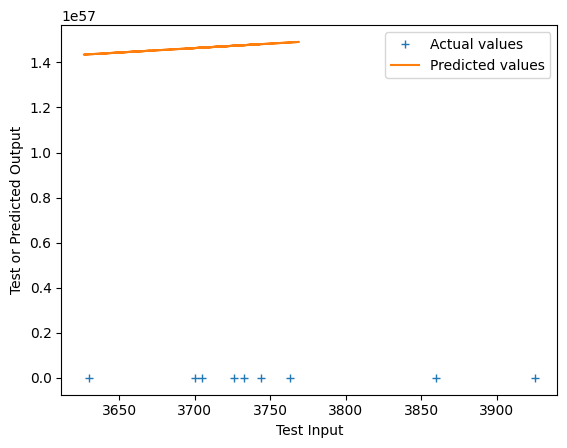

In [39]:
y_pred = np.multiply(parameters['m'], train_input) + parameters['c']

plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(train_input, y_pred, label= 'Predicted values')
plt.xlabel('Test Input')
plt.ylabel('Test or Predicted Output')
plt.legend()
plt.show()

In [31]:
prediction=linear_reg.predict(3670)
print(prediction)

1.4516445971258946e+57


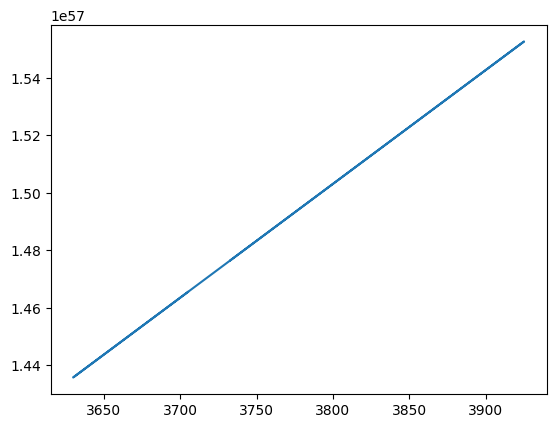

In [37]:
plt.plot(test_input, y_pred, label= 'Predicted values')